<h1>Análise de procedimentos hospitalares do SUS</h1>

<h2>Módulo 1</h2>

# Aula 1

## Primeiros passos

Neste documento, será feita uma análise do custo total de procedimentos hospitalares, separados por Estado e medidos mensalmente.
O primeiro passo é importar as bibliotecas necessárias.

In [1]:
import pandas as pd # Manipulação de tratamento de dados
import matplotlib.pyplot as plt # Plotagem de gráficos
import matplotlib.ticker as ticker # Formatação de dados de gráficos

A segunda etapa é realizar a leitura dos dados. Neste caso, usamos o dataset 'A192613189_28_143_208.csv', disponível no <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def'>Datasus</a>.

In [2]:
dados = pd.read_csv('A192613189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, engine='python', thousands='.', decimal=',')
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,...,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06,9.266015e+06,7.730597e+06,1.102331e+07,9.964113e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,...,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06,3.715723e+06,3.538428e+06,4.077046e+06,4.500485e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,...,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07,2.143029e+07,2.591713e+07,2.203218e+07,1.917248e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,...,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06,3.266928e+06,3.519774e+06,3.985530e+06,3.288770e+08
4,15 Pará,18864744.11,1.955376e+07,2.193734e+07,2.084283e+07,2.324995e+07,2.324069e+07,2.400222e+07,2.334122e+07,2.517226e+07,...,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07,3.835468e+07,3.768831e+07,3.327639e+07,4.705309e+09
5,16 Amapá,1120973.34,1.268740e+06,9.746512e+05,1.141137e+06,8.663462e+05,1.440979e+06,1.426659e+06,1.475551e+06,1.651341e+06,...,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06,2.802886e+06,2.817849e+06,3.188211e+06,3.098601e+08
6,17 Tocantins,3441592.69,4.985689e+06,6.205613e+06,4.984482e+06,5.511002e+06,4.927934e+06,5.445602e+06,5.413710e+06,5.596670e+06,...,9.155572e+06,8.390268e+06,8.729632e+06,7.770886e+06,5.278405e+05,6.752771e+05,4.195535e+05,3.191609e+05,1.357751e+06,1.020028e+09
7,21 Maranhão,10723506.39,1.355968e+07,1.398514e+07,1.480942e+07,1.450573e+07,1.490809e+07,1.578490e+07,1.519531e+07,1.495128e+07,...,3.547349e+07,3.221904e+07,3.007715e+07,3.320078e+07,3.194267e+07,3.078340e+07,3.073875e+07,3.092448e+07,3.966368e+07,3.871069e+09
8,22 Piauí,7985142.43,1.007993e+07,1.029837e+07,1.077598e+07,1.039836e+07,1.052825e+07,1.104011e+07,1.054918e+07,1.089920e+07,...,1.990857e+07,2.566354e+07,2.023078e+07,2.238922e+07,1.891160e+07,2.088397e+07,2.268939e+07,1.940027e+07,2.001833e+07,2.280889e+09
9,23 Ceará,15539821.90,2.573510e+07,2.872463e+07,3.067646e+07,3.060445e+07,3.127240e+07,3.092539e+07,2.785144e+07,3.036272e+07,...,5.601951e+07,6.171949e+07,5.662592e+07,5.907460e+07,5.691650e+07,5.084935e+07,5.207822e+07,5.317125e+07,6.207962e+07,6.591837e+09


Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format

E agora nos certificamos que a formação está correta!

In [4]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,3253399.45,2946398.44,2416019.23,2203732.04,2218532.26,2566919.60,2802886.34,2817849.31,3188210.98,309860092.59
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,9155572.36,8390267.72,8729632.49,7770885.66,527840.46,675277.05,419553.49,319160.87,1357751.33,1020028272.64
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,35473489.49,32219037.29,30077152.72,33200778.47,31942670.33,30783403.58,30738750.31,30924484.99,39663677.48,3871069498.04
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,19908573.27,25663537.49,20230782.72,22389215.72,18911604.50,20883972.79,22689390.32,19400269.01,20018325.75,2280888802.74
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,56019506.33,61719491.69,56625919.77,59074596.33,56916499.66,50849353.22,52078218.88,53171253.41,62079618.54,6591836650.18


Apenas para testes, podemos verificar a média total do dataset.

In [5]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

## Iniciando com gráficos

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro mostrará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

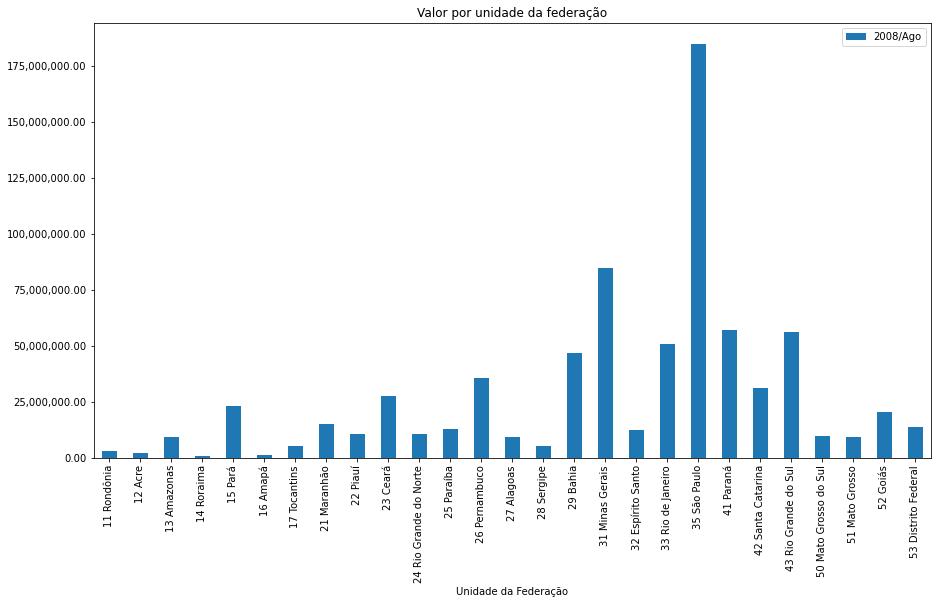

In [6]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Valor por unidade da federação')
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

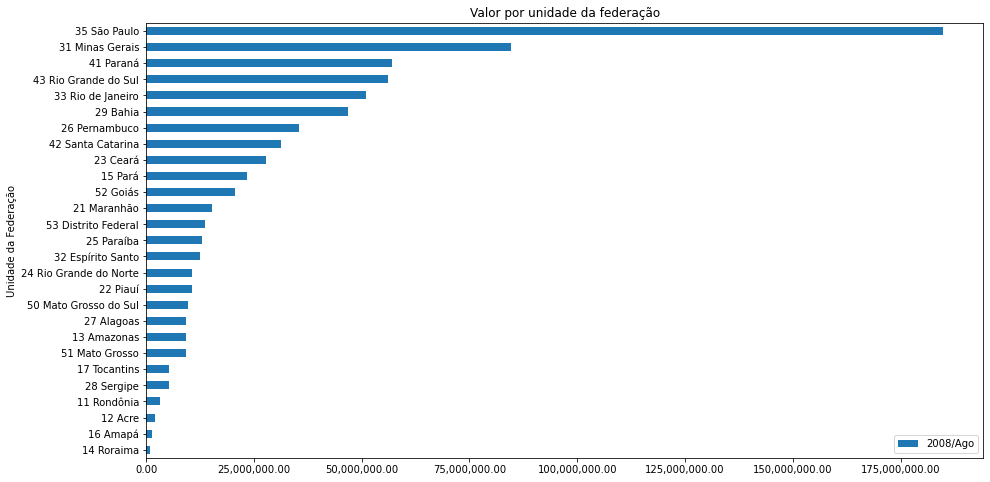

In [7]:

dados_ordenados = dados.sort_values(by='2008/Ago', ascending=False)
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

## Desafios

### 1 - Escolher um título mais descritivo

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo X (valores) divido por um milhão, para facilitar a legibilidade.

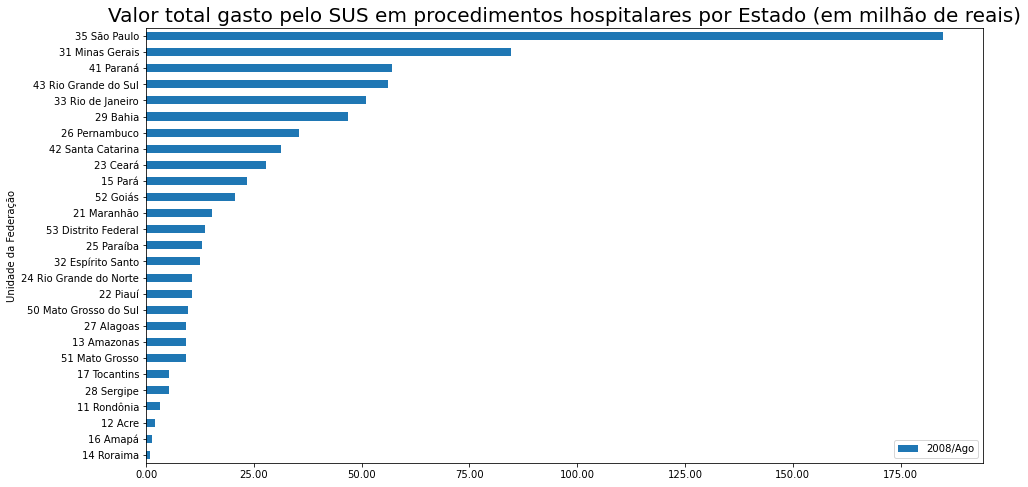

In [8]:
dados_ordenados['2008/Ago'] /= 1000000
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

### 2 - Mesma análise da aula, porém com o mês mais recente

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [9]:
dados[dados.columns[-3:]].head()

,2021/Fev,2021/Mar,Total
0,7730597.04,11023309.47,996411254.68
1,3538427.92,4077045.92,450048530.47
2,25917134.55,22032176.22,1917247936.05
3,3519773.73,3985530.08,328876965.09
4,37688314.23,33276392.89,4705309002.29


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Março de 2021. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano. Existe uma linha na coluna referente ao mês de março que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguida, plotar o gráfico.

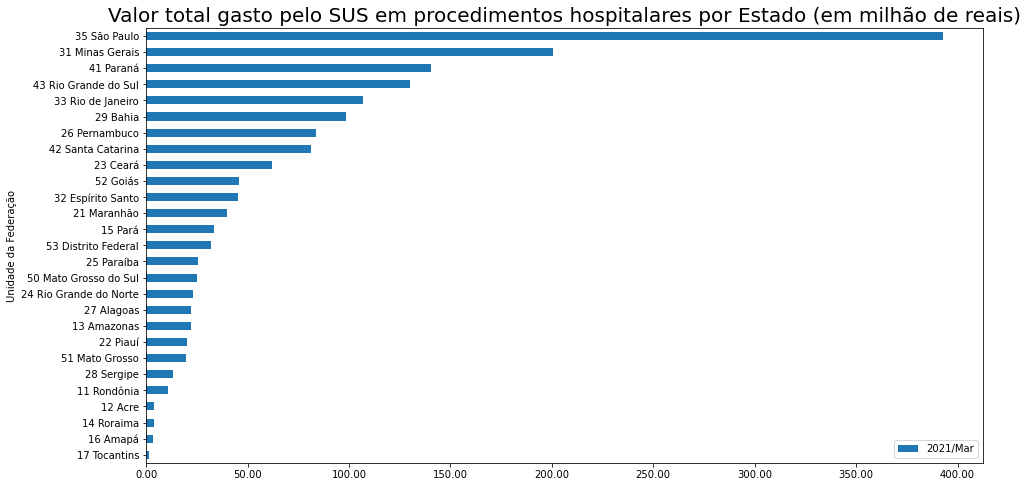

In [10]:
#dados['2021/Mar'] = dados['2021/Mar'].str.replace(r'-', '0').astype(float)
dados_mais_recentes = dados.sort_values(by='2021/Mar', ascending=False)
dados_mais_recentes['2021/Mar'] /= 1000000
ax = dados_mais_recentes.plot(x='Unidade da Federação', y='2021/Mar', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

# Aula 2

## Importando dataset de atendimentos

A partir deste ponto faremos o mesmo procedimento de import de dados realizado na aula passada, porém com um dataset de atendimentos do SUS. O dataset foi obtido por meio <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def'>deste link</a>.

In [11]:
dados_atendimentos = pd.read_csv('A224855189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, engine='python', thousands='.', decimal=',')
dados_atendimentos

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


## Fazendo slicing de dados.

É possível selecionar apenas uma parte do dataset para realizar algumas análises exploratórias. Por exemplo, podemos pegar dados de apenas duas colunas - agosto e setembro de 2008.

In [12]:
dados_atendimentos[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Podemos realizar comparações com estes dados. Por exemplo, comparar gastos entre dois ou mais estados. Mas para isso, precisaremos coletar colunar que tenham dados de gastos em todos os meses pois, como vimos acima, existem colunas que não possuem dados. Uma forma de fazer esta tarefa é tirar a média do dataset.

In [13]:
dados_atendimentos.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Note que trouxe apenas dados a partir de 2007, mesmo tendo colunas que começam em '1992/Mar'. Isso porque a função média ignora colunas que não tem dados numéricos para fazer conta. Como estamos interessados nos nomes da colunas, podemos pegar todos eles, usando o índice.

In [14]:
colunas_usaveis = dados_atendimentos.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


Agora podemos fazer um novo sclicing dos nossos dados, pegando apenas colunas que contenham dados para comparação.

In [15]:
dados_atendimentos[colunas_usaveis]

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


Quase tudo ok. O problema é que o índice do dataset está configurado com uma sequência numérica que vai do número 0 ao 26. Porém o ideal no nosso caso é que o índice seja o nome dos Estados. Podemos mudar isso.

In [16]:
dados_atendimentos = dados_atendimentos[colunas_usaveis]
dados_atendimentos = dados_atendimentos.set_index('Unidade da Federação')
dados_atendimentos


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74


Como o índice foi trocado, podemos buscar dados pelo mesmo. A instrução abaixo deve ser entendida como 'localize a linha (todos os meses e anos) cujo índice seja igual a 21 Maranhão'. 

In [17]:
dados_atendimentos.loc['21 Maranhão']

2007/Ago       385330.18
2007/Set      1018352.93
2007/Out      2277717.78
2007/Nov      4334468.23
2007/Dez      8832514.85
                ...     
2020/Dez     30927070.93
2021/Jan     26797697.76
2021/Fev     23260245.95
2021/Mar     17294509.11
Total      3871069498.04
Name: 21 Maranhão, Length: 165, dtype: float64

## Plotando gráficos

Vamos plotar um gráfico do nosso dataset da forma mais simples possível.

<AxesSubplot:xlabel='Unidade da Federação'>

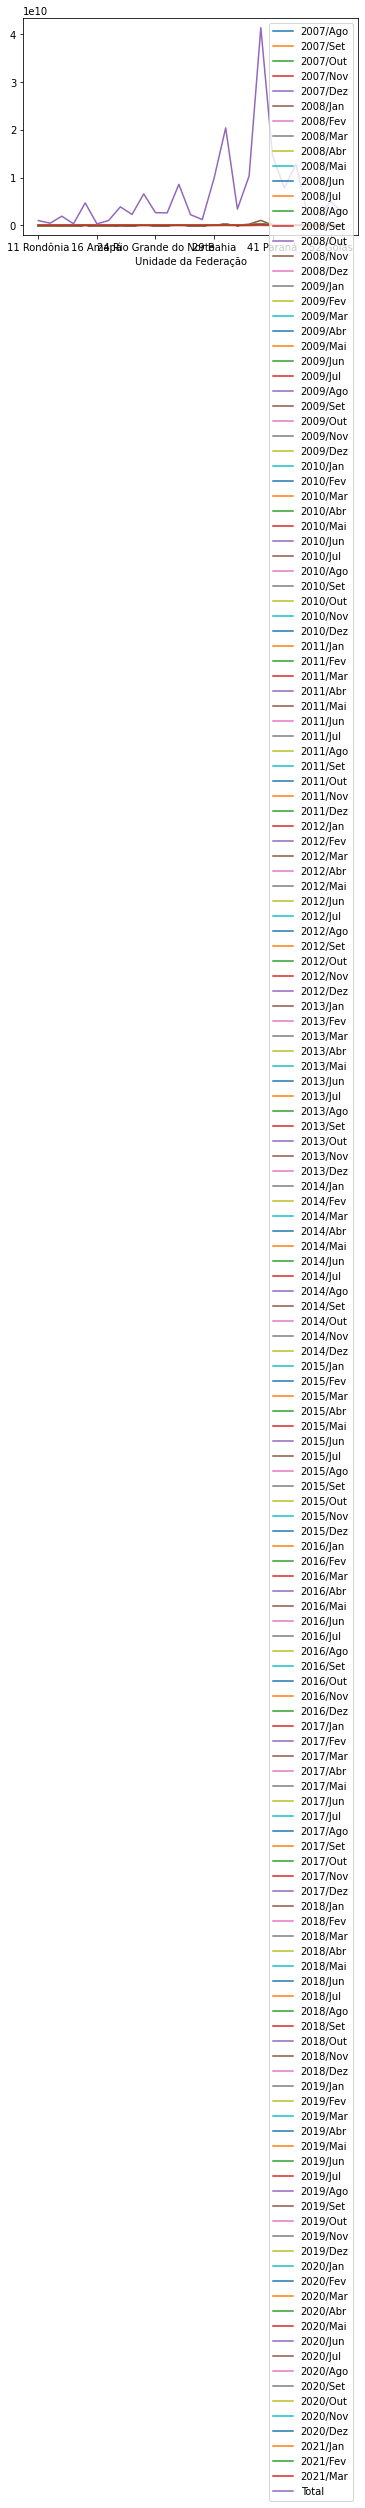

In [18]:
dados_atendimentos.plot()

Aconteceu um efeito indesejado. Ficou bem estranho! Ele entendeu que cada mês e ano são as linhas do gráfico, enquanto os Estados são as colunas. Por que isso aconteceu? Vamos observar o dataset novamente.

In [19]:
dados_atendimentos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


O plot está pegando os dados das colunas e formando as linhas. O ideal é que os Estados fossem as colunas do nosso dataset, enquanto que os meses e anos fossem as linhas. Em outras palavras, precisamos rotacionar o nosso dataset. Isso é feito da seguinte forma:

In [20]:
dados_atendimentos.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


Isso torna-se possível usando o 'T'. Vamos plotar novamente.

<AxesSubplot:>

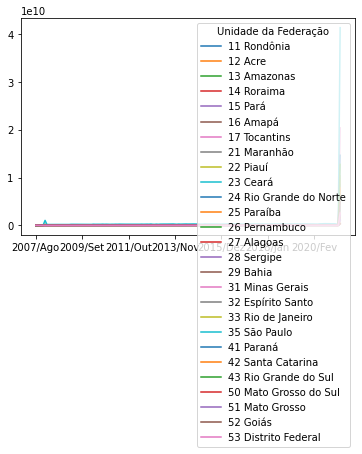

In [21]:
dados_atendimentos.T.plot()

O gráfico tem muitas linhas, porém passa a fazer mais sentido. A tarefa agora é 'fatiar' os dados para plotar somente aquilo que for de interesse na exploração de dados. Mesmo assim, podemos observar que na parte direita do gráfico os valores estão enormes. Isso é porque existe uma coluna totalizando os gastos dos Estados, prejudicando a exploração e legibilidade dos dados.

In [22]:
dados_atendimentos.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12764391179.92
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77,2324525096.33
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09,2180119781.15
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,...,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02,4973572261.43
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43,2592422853.56


Precisamos remover esta coluna. Para não prejudicar o dataset original, vamos criar uma cópia dele sem a coluna total.

In [23]:
dados_atendimentos_sem_total = dados_atendimentos.drop('Total', axis=1)
dados_atendimentos_sem_total

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,35894441.09,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53


Agora sim podemos plotar novamente.

<AxesSubplot:>

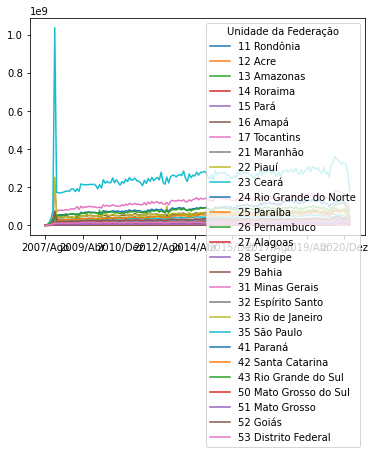

In [24]:
dados_atendimentos_sem_total.T.plot()

O gráfico agora faz um pouco mais de sentido, mas ainda carece de ajustes.

## Desafios

### 1- Posicionar a legenda do gráfico de forma mais adequada

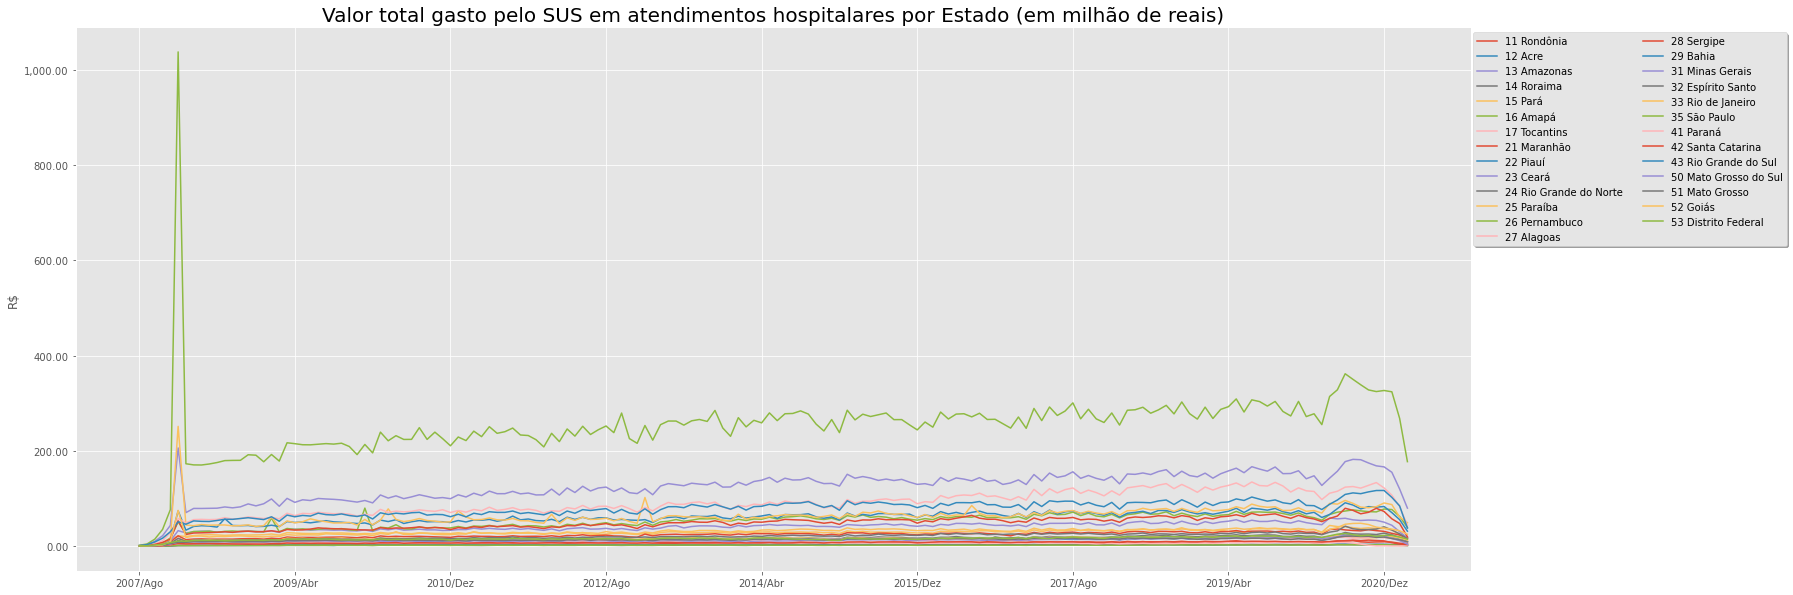

In [25]:
dados_atendimentos_sem_total_plot = dados_atendimentos_sem_total.div(1000000)
plt.style.use('ggplot')
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel('R$')
plt.title('Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

### 2 - Plotar o gráfico de linha com apenas 5 estados de sua preferência

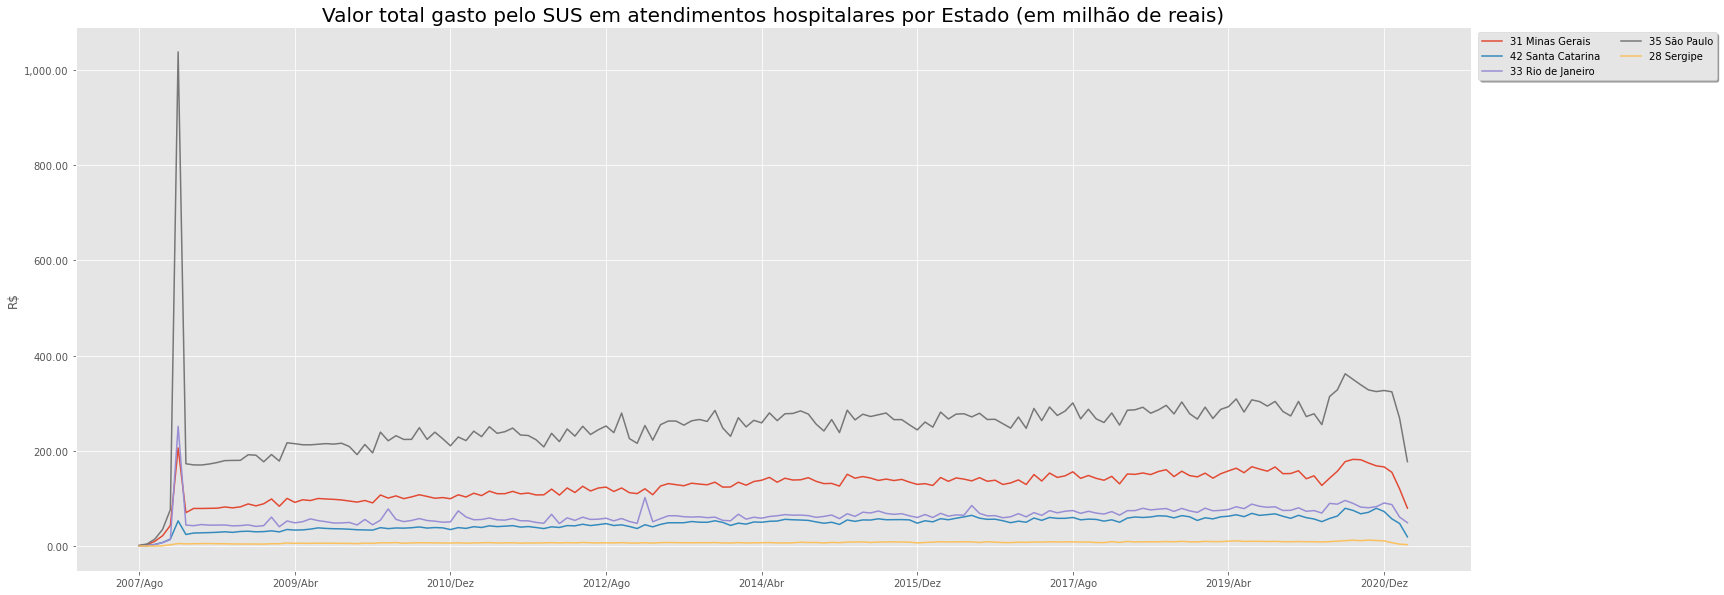

In [26]:
plt.style.use('ggplot')
ax = dados_atendimentos_sem_total_plot.T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()